In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from utils import N

np.set_printoptions(formatter={"float":"{:0.2f}".format})

df = pd.read_csv("spam.csv")
data = df.to_numpy()

# Tarea 2

## 1. Generos  

Un programa de salud gubernamental desea clasificar los registros de las personas en géneros Femenino (F) o Masculino (M) a partir de los atributos nombre, estatura y peso. Se cuentan con los siguientes registros:

In [4]:
data ={
   "Nombres":["Denis","Guadalupe","Alex","Alex", "Cris",
               "Juan","Juan","Denis","Alex","Cris","Rene","Guadalupe","Guadalupe"],
   "Estatura (m)":[1.72,1.82,1.8,1.7,1.73,1.8,1.8,1.5,1.52,1.62,1.67,1.65,1.75],
   "Peso (kg)":[75.3,81.6,86.1,77.1,78.2,74.8,74.3,50.5,45.3,61.2,68.0,58.9,68.0],
   "Genero":["M","M","M","M","M","M","M","F","F","F","F","F","F"],
   }

df = pd.DataFrame(data, columns = ["Nombres","Estatura (m)","Peso (kg)","Genero"])
df

,Nombres,Estatura (m),Peso (kg),Genero
0,Denis,1.72,75.3,M
1,Guadalupe,1.82,81.6,M
2,Alex,1.80,86.1,M
3,Alex,1.70,77.1,M
4,Cris,1.73,78.2,M
5,Juan,1.80,74.8,M
6,Juan,1.80,74.3,M
7,Denis,1.50,50.5,F
8,Alex,1.52,45.3,F
9,Cris,1.62,61.2,F


Entrena un clasificador bayesiano ingenuo usando estimación por máxima verosimilitud y otro usando estimación por máximo a posteriori. Reporta los parámetros que obtuviste en embos casos y usa los clasificadores entrenados para predecir la clase de los siguientes vectores 

$$x_{1} = (\text{Rene},1.68,65)$$
$$x_{2} = (\text{Guadalupe},1.75,80)$$
$$x_{3} = (\text{Denis},1.80,79)$$
$$x_{4} = (\text{Alex},1.90,85)$$
$$x_{5} = (\text{Cris},1.65,70)$$


Describe de forma detallada el procedimiento que seguiste tante en el entrenamiento como en la predicción y discute los resultados obtenidos. Para el entrenamiento del clasificador por máximo a posteriori considera los siguientes valores para las distribuciones correspondientes 

---

In [6]:
alpha = 2
muoEM = 1.7;  muoEF = 1.5;  sigmaoEM_2 = 0.3;  sigmaoEF_2 = 0.1
muoPM = 85.5; muoPF = 70.3; sigmaoPM_2 = 17.0; sigmaoPF_2 = 85.0

data = df.to_numpy()

Se contabiliza el número de elementos de cada clase y el número total de datos. Vamos a implementar un clasificador bayesano ingenuo utilizando estimadores de máxima verosimilitud y máximo a posteriori . A continuación el cálculo de los estimadores de EMV dadas por las siguientes expresiones


$$\hat{\mu}_{EMV}=\frac{1}{n}\sum_{j=1}^{n}x^{(j)} \qquad \hat{\sigma}^{2}_{EMV} = \frac{1}{n}\sum_{j=1}^{n}(x^{(j)}-\hat{\mu}_{EMV})^{2} $$


In [17]:
NM = float(sum(data[:,-1:] == "M")) # Number of class H data
NF = float(sum(data[:,-1:] == "F")) # Number of class F data
NT  = np.shape(data)[0]             # Total number of data

mu_Est = np.mean(data[:,1:2]) ; std_Est = np.std(data[:,1:2]) 
mu_Pes = np.mean(data[:,2:3]) ; std_Pes = np.std(data[:,2:3])

Mas = data[data[:,-1]=="M"][:,:-1]
Fem = data[data[:,-1]=="F"][:,:-1]
NamM = data[data[:,-1]=="M"][:,:1]
NamF = data[data[:,-1]=="F"][:,:1]


# Normal distribution
mu_EM = np.mean(Mas[::,-2]); std_EM = np.std(Mas[::,-2])
mu_EF = np.mean(Fem[::,-2]); std_EF = np.std(Fem[::,-2])
mu_PM = np.mean(Mas[::,-1]); std_PM = np.std(Mas[::,-1])
mu_PF = np.mean(Fem[::,-1]); std_PF = np.std(Fem[::,-1])

# Categorical Distribution
q_M = np.asarray(np.unique(NamM,return_counts=True))
q_F = np.asarray(np.unique(NamF,return_counts=True))

qM_prov = {q_M[0][i]:q_M[1][i] for i in range(len(q_M[0]))}
qF_prov = {q_F[0][i]:q_F[1][i] for i in range(len(q_F[0]))}

mu = np.array([mu_EM,mu_PM,mu_EF,mu_PF])
std = np.array([std_EM,std_PM,std_EF,std_PF]) 

print(" Estatura Masculino   = {0:.3f}".format(mu_EM))
print(" Estatura Femenino    = {0:.3f}".format(mu_EF))
print(" Peso Masculino       = {0:.3f}".format(mu_PM))
print(" Peso Femenino        = {0:.3f}".format(mu_PF))

 Estatura Masculino   = 1.767
 Estatura Femenino    = 1.618
 Peso Masculino       = 78.200
 Peso Femenino        = 58.650


Para este problema se tiene que considerar una función de distribución de probabilidad para cada atributo , en el caso del nombre se uliza una distribución categórica y para la estatura y el peso una distribución normal dadas por las siguientes expresiones

$$\mathcal{N}(\vec{x}|\mu,\sigma^{2})=\frac{1}{(2\pi\sigma)^{1/2}}e^{-\frac{1}{2\sigma^{2}}(x-\mu)^{2}} \qquad f(x;\vec{q})=\prod_{\kappa=1}^{K}q_{\kappa}^{[x=\kappa]}$$

donde los estimadores de la distribución categórica están dado por 

$$\hat{q}_{\kappa} = \frac{c_{\kappa}}{n},\qquad c_{\kappa}=\sum_{i=1}^{n}[x=\kappa]$$


Luego se plantea el uso del clasificador como sigue 

$$C= \underset{C\in\{Nomb,Est,peso\}}{\mathrm{ArgMax}} \left[ P(C)\prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma_{2})q_{n}^{[x=n]}\right], \qquad c_{n} = \sum_{i=1}^{n}[x=n] $$

En donde $P(C)$ sigue una distribución binomial dado que se debe elegir entre "Masculino" y "Femenino".

Se costruye la función que hace la comparacion entre los clasificadores y se define una matriz que contiene los datos que se deben predecir 






In [9]:
def MVE(x):
   InCMdata = x[0] in qM_prov; InCFdata = x[0] in qF_prov
   CM = 0; CF = 0
   
   if InCMdata == True:
      CM = (NM/NT)*np.prod(N(x[1:],mu[:2],std[:2]))*qM_prov[str(x[0])]/NM
   if InCFdata == True:
      CF = (NF/NT)*np.prod(N(x[1:],mu[2:4],std[2:4]))*qF_prov[str(x[0])]/NF
   clases = {CM:"Masculino",CF:"Femenino"}
   return x,clases[max(CM,CF)],CM,CF

#Muestra para predecir 
X_p =  [["Rene",1.68,65.],
             ["Guadalupe",1.75,80.],
             ["Denis",1.80,79.],
             ["Alex",1.90,85.],
             ["Cris",1.65,70]]

Ahora se presentan las predicciones que proporciona el modelo  usando EMV


In [11]:
for i in range(len(X_p)):
   print(MVE(X_p[i]))

print(" ")

(['Rene', 1.68, 65.0], 'Femenino', 0, 0.024617189167210275)
(['Guadalupe', 1.75, 80.0], 'Femenino', 0.03453817661333737, 2.2776213815668176)
(['Denis', 1.8, 79.0], 'Femenino', 0.03863089376964986, 2.4307667134297692)
(['Alex', 1.9, 85.0], 'Femenino', 19.818789779153725, 392.27808779856326)
(['Cris', 1.65, 70], 'Masculino', 7.295540261399398, 0.03803909213190314)
 


En lo que sigue se debe calcular las constantes para el MAP, que vienen dadas por 

$$\hat{\mu} = \frac{\sigma_{o}^{2}\left(\sum_{i=1}^{n}x^{(i)}\right)-\sigma^{2}\mu_{o}}{\sigma^{2}_{o}n+\sigma^{2}}\qquad \text{Distribución normal}$$

$$\hat{q}_{k} = \frac{c_{k}+\alpha_{k}-1}{n+\sum_{k=1}^{K}\alpha_{k} - K} \qquad \text{Distribución categórica}$$

Ahora se calculan estos parámetros


In [30]:
mu_EM2 = (sigmaoEM_2*sum(Mas[::,-2])+(std_EM**2)*muoEM)/(sigmaoEM_2*NM + std_EM**2)
mu_EF2 = (sigmaoEF_2*sum(Fem[::,-2])+(std_EF**2)*muoEF)/(sigmaoEF_2*NF + std_EF**2)
mu_PM2 = (sigmaoPM_2*sum(Mas[::,-1])+(std_EM**2)*muoPM)/(sigmaoPM_2*NM + std_PM**2)
mu_PF2 = (sigmaoPF_2*sum(Fem[::,-1])+(std_EF**2)*muoPF)/(sigmaoPF_2*NF + std_PF**2)

mu2 = np.array([mu_EM2,mu_PM2,mu_EF2,mu_PF2])
print("Estatura Masculino   = {}".format(mu2[0]))
print("Peso Masculino       = {}".format(mu2[1]))
print("Estatura Femenino    = {}".format(mu2[2]))
print("Peso Femenino        = {}".format(mu2[3]))

qM_prov = {q_M[0][i]:q_M[1][i] for i in range(len(q_M[0]))}
qF_prov = {q_F[0][i]:q_F[1][i] for i in range(len(q_F[0]))}



Estatura Masculino   = 1.767078321148749
Peso Masculino       = 69.05296940116787
Estatura Femenino    = 1.6168825823917028
Peso Femenino        = 51.48287713140879


Los parámetros de la categórica se implementan dentro de la funcion de estimación

In [31]:
def MAP(x):
   InCMdata = x[0] in qM_prov; InCFdata = x[0] in qF_prov
   CM = 0; CF = 0
   
   if InCMdata == True:
      CM = (NM/NT)*np.prod(N(x[1:],mu2[:2],std[:2]))*(qM_prov[str(x[0])]+alpha-1)/(NM+alpha*NM-NM)
   if InCFdata == True:
      CF = (NF/NT)*np.prod(N(x[1:],mu2[2:4],std[2:4]))*(qF_prov[str(x[0])]+alpha-1)/(NF+alpha*NF-NF)
   clases = {CM:"Masculino",CF:"Femenino"}
   return x,clases[max(CM,CF)],CM,CF

Se hace la predicción de los datos propuestos por el ejercicio

In [32]:
for i in range(len(X_p)):
   print(MAP(X_p[i]))
print(" ")

(['Rene', 1.68, 65.0], 'Femenino', 0, 0.06791228839361729)
(['Guadalupe', 1.75, 80.0], 'Femenino', 1.3931693913720178, 21.71152757385047)
(['Denis', 1.8, 79.0], 'Femenino', 0.8736988274721701, 28.202435888090267)
(['Alex', 1.9, 85.0], 'Masculino', 10959.21442120047, 8503.619880250359)
(['Cris', 1.65, 70], 'Masculino', 0.8864686998045899, 0.17281196558926418)
 


# 2. Spam 

Dado el conjunto de datos "spam.csv" y realiza los siguientes ejercicios. El archivo *spam.csv* contiene 2001 valores por cada renglon de los cuales los primeros 2000 representan el histograma de palabras de un correo y el último corresponde a la clase , esto es, 1 si es spam y 0 si no lo es 

Esta es la base de datos, los extraemos y ponemos en forma adecuada para trabajar con numpy 

In [191]:
df = pd.read_csv("spam.csv")
data = df.to_numpy()

x = []
for i in range(len(data)):
    x.append(np.array([float(i) for i in data[i][0].split()]))
x = np.array(x)



* Reporta el porcentaje de correos que están etiquetados como spam y como no spam

In [192]:
Num_Spam = sum(x[:,-1] == True)
Num_NSpam = sum(x[:,-1] == False)

print("Porcentaje de corres Spam            = {0:.3f}".format(Num_Spam/len(data)))
print("Porcentaje de corres que no son Spam = {0:.3f}".format(Num_NSpam/len(data)))


Porcentaje de corres Spam            = 0.290
Porcentaje de corres que no son Spam = 0.710


* Divide aleatoriamente el conjunto de datos en el 70% para entrenamiento y el 30% restante para validación usando 0 como semilla para tu generador de n

In [193]:
# Reorganizacion de las listas
x = np.random.permutation(x)
#eleccion de los datos de entrenamiento 
x_train = x[0:int(len(x)*0.7)]
x_val = x[int(len(x)*0.7)-1:-1]

* Entrena 2 clasificadores bayesianos ingenuos con distintas distribuciones 

vamos a ver que tipos de clases tenemos , para poder calcular los parametros de cada clase separamos en dos grupos, los que son spam y los que no para calcular los respectivos $q_{k}$ de cada clase

In [194]:
NS = sum(x_train[:,-1] == True)
NNS = sum(x_train[:,-1] == False)
Nt = len(x_train) 

spam_train  = x_train[x_train[:,-1]==1][:,0:-1]
Nspam_train = x_train[x_train[:,-1]==0][:,0:-1]



Asumimos que en nuestro problema las clases se distribuyen como una distribucion Bernoulli dado por 

$$P(C) = q^{C}(1-q)^{1-C} \qquad \hat{q}_{C}=\frac{N_{c}}{N}$$

esto para cada clase será

In [195]:
qs = NS/Nt
qns = NNS/Nt

print("Estimador clase spam    = {0:.3f}".format(qs))
print("Estimador clase no spam = {0:.3f}".format(qns))

Estimador clase spam    = 0.288
Estimador clase no spam = 0.712


Ahora se estiman las verosimilitudes asumiendo que los datos se distribuyen como una multinomial dada por la siguiente expresión 

$$P(x|C) = \frac{n!}{\prod_{t=1}^{|v|}}\prod_{t=1}^{|v|}q(w_{t}|C)^{x_{t}}$$

Sin embargo, podemos ignorar el término de normalización para calcular la siguiente expresión

$$P(x|C) \propto \prod_{t=1}^{|v|}q(w_{t}|C)^{x_{t}} $$

Para estimar cada parametro de cada clase tenemos que tener en cuenta la frecuencia de la palabra en cada clase dadas por $n_{c}(w_{t})$

$$\hat{q}(w_{t}|C) = \frac{n_{C}(w_{t})}{\sum_{s=1}^{|V|}n_{C}(w_{t})}$$

Se cuenta el número de ocurrencias de las palabras en las clases $n_{C}(w_{t})$

In [196]:
pst = spam_train.sum(axis=0)/spam_train.sum()
pNst = Nspam_train.sum(axis=0)/Nspam_train.sum()

print(qs*np.power(pst,x_val[0][:-1]).prod())
print(qns*np.power(pNst,x_val[0][:-1]).prod())
print(max(qs*np.power(pst,x_val[0][:-1]).prod(),qns*np.power(pNst,x_val[0][:-1]).prod()))

4.815742914037902e-99
0.0
4.815742914037902e-99


Se construye el clasificador asumiendo que le entra un renglon que representa un correo, que es el histograma de palabras


In [197]:
def Clasificador(x):
    x_t = x[:-1]
    Cs = qs*np.power(pst,x).prod()
    CNs = qns*np.power(pNst,x).prod()
    clases={Cs:1.0,CNs:0.0}
    return clases[max(Cs,CNs)]

Se verifica el grupo de validación corroborando cuantos casos se acierta en la predicción dada la etiqueta de los datos de validacion 


In [198]:
xprueba = []
for i in range(len(x_val)):
    xprueba.append(Clasificador(x_val[i][:-1]))
    
sum(xprueba==x_val[::,-1])/len(x_val)

0.9207474226804123

In [189]:
xprueba==x_val[::,-1]

array([ True,  True,  True, ...,  True,  True,  True])

* Emplea los clasificadores entrenados para predecir "Spam" tanto en los datos de entrenamiento como en los de validación y reporta el porcentaje de predicciones de cada clasificador.

In [78]:
spam_train

array([[0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 1.00, 0.00],
       ...,
       [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00]])

* Discute el desempeño de los clasificadores 

In [70]:
Y = np.random.rand(4,4)
Y

array([[0.83, 0.02, 0.09, 0.22],
       [0.04, 0.23, 0.30, 0.92],
       [0.20, 0.30, 0.25, 0.86],
       [0.49, 0.61, 0.93, 0.00]])

In [106]:
x = []
for i in range(len(data)):
    x.append(np.array([float(i) for i in data[i][0].split()]))
x = np.array(x)

In [249]:
Num_Spam = sum(x[:,-1] == True)
Num_NSpam = sum(x[:,-1] == False)

print(Num_Spam/len(data))
print(Num_NSpam/len(data))

# Reorganizacion de las listas
x = np.random.permutation(x)
#eleccion de los datos de entrenamiento 
x_train = x[0:int(len(x)*0.7)]
x_val = x[int(len(x)*0.7)-1:-1]



0.28969251595436085
0.7103074840456391


In [281]:
spam_train  = x_train[x_train[:,-1]==1][:,0:-1]
Nspam_train = x_train[x_train[:,-1]==0][:,0:-1]


In [308]:
np.unique(spam_train[:,0,],return_counts = True)

(array([ 0.,  1.,  2.,  3.,  4.,  6.,  8., 10., 13., 14., 42., 43., 48.,
        51.]),
 array([725, 210,  93,  18,   2,   1,   2,   1,   1,   1,   1,   1,   1,
          1]))

In [271]:
spam_train

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [256]:
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [287]:
y[:,0,]

array([0, 3, 6])

In [233]:
y = arr
y[:,-1:]==5

array([[False],
       [ True],
       [False]])

In [246]:
np.unique(Num_spam[3], return_counts =True)

(array([0., 1., 2., 3.]), array([1976,   22,    2,    1]))

In [217]:
for i in range(len(x[0])):
    if x[0][i] == 7:
        print(i)

112
277


# 3. Cáncer de seno 

Divide aleatoriamente el conjunto de datos de cancer de serno de Wisconsin en un subconjunto de entrenamiento con el 70% de los datos y un subconjunto de validación con el 30% restante usando 0 como semilla para tu generador de numeros aleatorios. Este conjunto de datos contiene 699 registros de tumores de seno, de los cuales 458 son beningnos y 241 son malignos. Cada registri consta de lo siguientes atributos.



In [34]:
Names = ["ID ","Grosor del tumor","Uniformidad tamaño",
            "forma celula","Adhesion marginal","Tamaño celula epitelial",
            "Nucleos desnudos","Cromatina blanda","Núcleolos normales",
           "Mitosis de celulas","Clase"]
df1 = pd.read_csv("breast-cancer-wisconsin.data",names =Names)
df1


,ID,Grosor del tumor,Uniformidad tamaño,forma celula,Adhesion marginal,Tamaño celula epitelial,Nucleos desnudos,Cromatina blanda,Núcleolos normales,Mitosis de celulas,Clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Entrena un clasificador Bayesiano ingenuo de tumores de seno y evalúalo tanto con el subconjunto de entrenamiento como con el subjconjunto de validación y discute su desempeño. Existen 16 registros en el conjunto de datos con un atributo no especificado.  Investiga estrategias para rellenar los datos faltantes, utiliza las que consideres más adecuadas para este problema y discute el impacto en el desempeño del clasificador.

___


Se trabaja con arreglos de numpy para alguno calculos numéricos , luego se cambia el orden de los datos. En principio se entrena un clasificador sin los datos faltantes para tenerlo como referencia y ver si queda bien hecho el clasificador sto se hace identificando los datos inexistentes, utilizando la función *where* que retorna la columna y el indice en donde  existe un dato identificado como "?", que se debe rellenar antes de poder calcular los estimadores del clasificador bayesiano ingenuo 

In [ ]:
data = df1.to_numpy()

In [1051]:
data = np.random.permutation(data)
index = np.where(data == "?")
data_ref = np.delete(data,index,axis=0)

x_train = data_ref[0:int(len(data_ref)*0.7)]  #70% entrenamiento
x_val = data_ref[int(len(data_ref)*0.7)-1:-1] #30% validacion
x_val = x_val.astype(np.float)

# correcion de tipo de datos en la 6 columna para trabajar con float
x_val[:,6] = x_val[:,6].astype(np.float) 

Lo que se hace ahora es clasificar en dos grupos de datos, los pertenecientes al grupo Beningno que se identifican con el valor "2" y otro del grupo Maligno identificado con el "4". Esto con el fin de calcular los estimadores correspondientes a cada clase de cada atributo.



In [1052]:
Benigno = x_train[x_train[:,-1]==4]
Benigno[:,6] = Benigno[:,6].astype(np.float) 

Maligno = x_train[x_train[:,-1]==2]
Maligno[:,6] = Maligno[:,6].astype(np.float) 

NB_ref = len(Benigno)
NM_ref = len(Maligno)
NT = NB_ref + NM_ref


print("Numero de Tumores Beningnos = {}".format(NB_ref))
print("Numero de Tumores Malignos  = {}".format(NM_ref))
print("Numero datos totales entrenamiento = {}".format(NT))


Numero de Tumores Beningnos = 170
Numero de Tumores Malignos  = 307
Numero datos totales entrenamiento = 477


En este caso vamos a muestrear nuestros valores pertenecientes a cada atributo asumiendo que siguen una distribución normal dada por 

$$\mathcal{N}(\vec{x}|\mu,\sigma^{2})=\frac{1}{(2\pi\sigma)^{1/2}}e^{-\frac{1}{2\sigma^{2}}(x-\mu)^{2}}$$

Suponemos que el conjunto de observaciones de los atributos de las variables se distribuyen de manera uniforme y son independientes entre si. Vemos que la probabilidad conjunta de dos eventos independientes está dada por el producto de las probabilidades marginales para cada evento por separa, esto se representa de la siguiente 

$$P(\vec{x}|\mu,\sigma^{2}) = \prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma_{2})$$

luego los clasificadores se calculan de la siguiente manera 

$$C= \underset{C\in\{Spam,NoSpam\}}{\mathrm{ArgMax}} \left[ P(C)\prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma_{2})\right] $$

Utilizando el estimador de máxima verosimilitud los parámetros de la distribución son el promedio y la varianza, dadas por 

$$\hat{\mu}_{EMV} = \frac{1}{n}\sum_{i=1}^{n}x^{(i)}\qquad \hat{\sigma}^{2}_{EMV} = \frac{1}{n}(x^{(i)}-\hat{\mu}_{EMV})^{2}$$

Entonces podemos calcular estos parámetros de la siguiente forma

In [1053]:
#Calculo de los parámetros de cada clase

muM = [np.mean(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
muM = np.array(muM)
stdM = [np.std(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
stdM = np.array(std)

muB = [np.mean(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
muB = np.array(muB)
stdB = [np.std(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
stdB = np.array(stdB)

Estos son los parámetros obtenidos para cada atributo de cada grupo de datos 

In [1054]:
# promedio
print("promedio Beningno ={}".format(muB))
print("promedio Maligno  ={}".format(muM))

# desviacion estandar

print("desviacion Beningno ={}".format(stdB))
print("desviacion Maligno  ={}".format(stdM))




promedio Beningno =[7.15 6.68 6.59 5.75 5.41 7.66 6.06 5.96 2.54]
promedio Maligno  =[2.93 1.29 1.40 1.37 2.14 1.38 2.12 1.28 1.07]
desviacion Beningno =[2.45 2.77 2.66 3.24 2.42 3.11 2.28 3.28 2.50]
desviacion Maligno  =[2.44 2.70 2.61 3.21 2.44 3.06 2.27 3.38 2.57]


Ahora se construye una funcion que calcule las constante para cada clase y nos entregue la predicción, por tanto se tiene

In [1055]:
def MVE(x):
    id_muestra = x[0]
    x = x[1:-1]
    CB = (NB_ref/NT)*np.prod(N(x,muB,stdB))
    CM = (NM_ref/NT)*np.prod(N(x,muM,stdM))
    clases={CM:4.0,CB:2.0}
    return id_muestra, clases[max(CB,CM)] 

Ahora vamos a ver una predicción utilizando el conjunto de datos de validación, contando los aciertos de cada uno de los datos que proporciona el conjunto de validación y contrastando con el obtenido por el modelo 

In [1056]:
def rend(x_val):
    val = np.array([MVE(x_val[i]) for i in range(len(x_val))])
    y = val[:,-1]  == x_val[:,-1]
    return sum(y)/len(x_val)

In [1063]:
print("Rendimiento del clasificador = {}".format(rend(x_val)))

Rendimiento del clasificador = 0.9804878048780488


Este fue el modelo entrenado para el conjunto de datos que no incluye los datos que contenían "?", ahora se buscan propuestas para rellenar los datos faltanes tratando de obtener el mayor rendimiento segun la funcion construida anteriormente. 

Para esto debemos hacer que haga muchas pruebas en los 16 datos y asi elegir el valor que mas rendimiento de en el clasificador. Se construyen las funciones

In [1075]:
def entrenamiento(data,comb):
    data = np.random.permutation(data)
    index = np.where(data == "?")
    data[index] = comb


    x_train = data[0:int(len(data)*0.7)]  #70% entrenamiento
    x_val = data[int(len(data)*0.7)-1:-1] #30% validacion
    x_val[:,6] = x_val[:,6].astype(np.float) 


    Benigno = x_train[x_train[:,-1]==4]
    Benigno[:,6] = Benigno[:,6].astype(np.float) 

    Maligno = x_train[x_train[:,-1]==2]
    Maligno[:,6] = Maligno[:,6].astype(np.float) 

    NB_ref = len(Benigno)
    NM_ref = len(Maligno)
    NT = NB_ref + NM_ref

    muM = [np.mean(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
    muM = np.array(muM)
    stdM = [np.std(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
    stdM = np.array(std)

    muB = [np.mean(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
    muB = np.array(muB)
    stdB = [np.std(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
    stdB = np.array(stdB)
    
    return muM,muB,stdM,stdB

comb = np.random.randint(10,size=16)
muM,muB,stdM,stdB = entrenamiento(data,comb)
print(rend(x_val))
print(comb)

0.9804878048780488
[0 2 6 7 1 4 7 1 8 6 6 9 4 3 4 6]


Con un vector de prueba se calcula el rendimiento, hagamos esto varias veces y elijamos el que tenga el mayor valor o el rendimiento 

In [1081]:
Rend = []; Comb = []
for _ in range(10000):
    comb = np.random.randint(10, size=16)
    muM,muB,stdM,stdB = entrenamiento(data,comb)
    Rend.append(rend(x_val))
    Comb.append(comb)
    

Text(0, 0.5, 'Redimiento')

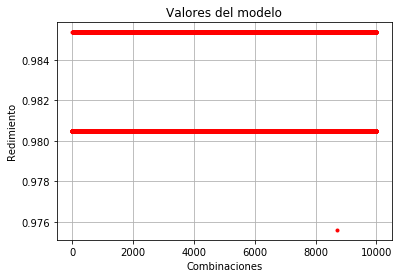

In [1084]:
plt.plot(Rend,"r.")
plt.grid(True)
plt.title("Valores del modelo")
plt.xlabel("Combinaciones")
plt.ylabel("Redimiento")

In [1088]:
print("Redimiento maximo = {}".format(Rend[np.argmax(Rend)]))
print("Combinación utilizada {} ".format(Comb[np.argmax(Rend)]))

Redimiento maximo = 0.9853658536585366
Combinación utilizada [3 4 2 2 4 1 2 2 0 3 3 1 8 8 3 9] 
